In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r Scotland_2019

In [5]:
Scotland_2019

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
36,36,RD Berrington (SCOT),8,8,0,285,81,35.62,304,93.75,...,112,1,1/36,112.00,5.09,132.0,0,0,5,0
46,46,DE Budge (SCOT),2,2,0,51,27,25.50,61,83.60,...,26,1,1/21,26.00,4.33,36.0,0,0,0,0
63,63,KJ Coetzer (SCOT),9,9,0,440,96,48.88,578,76.12,...,-,-,-,-,-,-,-,-,2,0
67,67,MH Cross (SCOT),9,9,0,271,59,30.11,435,62.29,...,-,-,-,-,-,-,-,-,6,1
72,72,JH Davey (SCOT),2,2,1,26,26*,26.00,27,96.29,...,68,2,2/46,34.00,4.00,51.0,0,0,1,0
92,92,AC Evans (SCOT),5,3,0,6,4,2.00,15,40.00,...,276,3,2/67,92.00,6.75,81.6,0,0,2,0
120,120,Hamza Tahir (SCOT),6,2,0,0,0,0.00,2,0.00,...,228,13,5/38,17.53,4.04,26.0,1,1,0,0
153,153,MA Jones (SCOT),3,3,0,87,52,29.00,130,66.92,...,-,-,-,-,-,-,-,-,1,0
181,181,MA Leask (SCOT),4,4,0,39,19,9.75,38,102.63,...,138,5,3/37,27.60,4.60,36.0,0,0,3,0
187,187,CS MacLeod (SCOT),9,9,0,322,100,35.77,399,80.70,...,76,1,1/13,76.00,4.75,96.0,0,0,8,0


In [6]:
Scotland_2019=Scotland_2019.reset_index()

In [7]:
Scotland_2019

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,36,36,RD Berrington (SCOT),8,8,0,285,81,35.62,304,...,112,1,1/36,112.00,5.09,132.0,0,0,5,0
1,46,46,DE Budge (SCOT),2,2,0,51,27,25.50,61,...,26,1,1/21,26.00,4.33,36.0,0,0,0,0
2,63,63,KJ Coetzer (SCOT),9,9,0,440,96,48.88,578,...,-,-,-,-,-,-,-,-,2,0
3,67,67,MH Cross (SCOT),9,9,0,271,59,30.11,435,...,-,-,-,-,-,-,-,-,6,1
4,72,72,JH Davey (SCOT),2,2,1,26,26*,26.00,27,...,68,2,2/46,34.00,4.00,51.0,0,0,1,0
5,92,92,AC Evans (SCOT),5,3,0,6,4,2.00,15,...,276,3,2/67,92.00,6.75,81.6,0,0,2,0
6,120,120,Hamza Tahir (SCOT),6,2,0,0,0,0.00,2,...,228,13,5/38,17.53,4.04,26.0,1,1,0,0
7,153,153,MA Jones (SCOT),3,3,0,87,52,29.00,130,...,-,-,-,-,-,-,-,-,1,0
8,181,181,MA Leask (SCOT),4,4,0,39,19,9.75,38,...,138,5,3/37,27.60,4.60,36.0,0,0,3,0
9,187,187,CS MacLeod (SCOT),9,9,0,322,100,35.77,399,...,76,1,1/13,76.00,4.75,96.0,0,0,8,0


In [8]:
Scotland_2019.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
Scotland_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,RD Berrington (SCOT),8,8,0,285,81,35.62,304,93.75,0,...,112,1,1/36,112.00,5.09,132.0,0,0,5,0
1,DE Budge (SCOT),2,2,0,51,27,25.50,61,83.60,0,...,26,1,1/21,26.00,4.33,36.0,0,0,0,0
2,KJ Coetzer (SCOT),9,9,0,440,96,48.88,578,76.12,0,...,-,-,-,-,-,-,-,-,2,0
3,MH Cross (SCOT),9,9,0,271,59,30.11,435,62.29,0,...,-,-,-,-,-,-,-,-,6,1
4,JH Davey (SCOT),2,2,1,26,26*,26.00,27,96.29,0,...,68,2,2/46,34.00,4.00,51.0,0,0,1,0
5,AC Evans (SCOT),5,3,0,6,4,2.00,15,40.00,0,...,276,3,2/67,92.00,6.75,81.6,0,0,2,0
6,Hamza Tahir (SCOT),6,2,0,0,0,0.00,2,0.00,0,...,228,13,5/38,17.53,4.04,26.0,1,1,0,0
7,MA Jones (SCOT),3,3,0,87,52,29.00,130,66.92,0,...,-,-,-,-,-,-,-,-,1,0
8,MA Leask (SCOT),4,4,0,39,19,9.75,38,102.63,0,...,138,5,3/37,27.60,4.60,36.0,0,0,3,0
9,CS MacLeod (SCOT),9,9,0,322,100,35.77,399,80.70,1,...,76,1,1/13,76.00,4.75,96.0,0,0,8,0


In [10]:
Scotland_2019_players =Scotland_2019.copy()

In [11]:
Scotland_2019_players.drop('Player',axis=1,inplace=True)

In [12]:
Scotland_2019_players.HS=Scotland_2019_players.HS.str.extract('(\d+)')
Scotland_2019_players['HS'].fillna(value=0, inplace=True)


In [13]:
Scotland_2019_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,8,8,0,285,81,35.62,304,93.75,0,2,...,112,1,1/36,112.00,5.09,132.0,0,0,5,0
1,2,2,0,51,27,25.50,61,83.60,0,0,...,26,1,1/21,26.00,4.33,36.0,0,0,0,0
2,9,9,0,440,96,48.88,578,76.12,0,5,...,-,-,-,-,-,-,-,-,2,0
3,9,9,0,271,59,30.11,435,62.29,0,3,...,-,-,-,-,-,-,-,-,6,1
4,2,2,1,26,26,26.00,27,96.29,0,0,...,68,2,2/46,34.00,4.00,51.0,0,0,1,0
5,5,3,0,6,4,2.00,15,40.00,0,0,...,276,3,2/67,92.00,6.75,81.6,0,0,2,0
6,6,2,0,0,0,0.00,2,0.00,0,0,...,228,13,5/38,17.53,4.04,26.0,1,1,0,0
7,3,3,0,87,52,29.00,130,66.92,0,1,...,-,-,-,-,-,-,-,-,1,0
8,4,4,0,39,19,9.75,38,102.63,0,0,...,138,5,3/37,27.60,4.60,36.0,0,0,3,0
9,9,9,0,322,100,35.77,399,80.70,1,2,...,76,1,1/13,76.00,4.75,96.0,0,0,8,0


In [14]:
Scotland_2019_players.replace("-",0,inplace=True)

In [15]:
Scotland_2019_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

Scotland_2019_players_scaled = pd.DataFrame(scaler.fit_transform(Scotland_2019_players),columns=Scotland_2019_players.columns)
Scotland_2019_players_scaled.shape
Scotland_2019_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.908408,1.085749,-0.470940,1.389252,1.460902,1.085798,1.008370,0.942960,-0.235702,0.916342,...,0.067806,0.047476,-0.505318,2.539985,0.655660,2.613985,-0.342997,-0.235702,1.317011,-0.235702
1,-1.045527,-0.818488,-0.470940,-0.410461,-0.171871,0.448777,-0.427228,0.667759,-0.235702,-0.597614,...,-0.576354,-0.698447,-0.505318,-0.168369,0.327033,-0.070497,-0.342997,-0.235702,-0.957826,-0.235702
2,1.234064,1.403122,-0.470940,2.581370,1.914450,1.920471,2.627110,0.464951,-0.235702,3.187276,...,-0.576354,-0.923959,-0.745344,-0.987174,-1.545272,-1.077178,-0.342997,-0.235702,-0.047891,-0.235702
3,1.234064,1.403122,-0.470940,1.281577,0.795698,0.738961,1.782293,0.089974,-0.235702,1.673320,...,-0.576354,-0.923959,-0.745344,-0.987174,-1.545272,-1.077178,-0.342997,-0.235702,1.771979,4.242641
4,-1.045527,-0.818488,0.217357,-0.602738,-0.202107,0.480250,-0.628093,1.011828,-0.235702,-0.597614,...,-0.576354,-0.334159,-0.265292,0.083571,0.184340,0.348953,-0.342997,-0.235702,-0.502859,-0.235702


In [17]:
Scotland_2019_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,...,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01
mean,2.337312e-17,1.168656e-16,-6.427607e-17,1.168656e-17,8.180591e-17,-1.636118e-16,-5.843279e-18,-4.674623e-17,-2.921640e-18,-2.337312e-17,...,3.505967e-17,-3.213803e-17,5.843279e-17,-8.180591e-17,2.804774e-16,-2.921640e-17,4.090295e-17,4.382459e-17,1.051790e-16,6.719771e-17
std,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,...,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00
min,-1.371182e+00,-1.453233e+00,-4.709403e-01,-8.027060e-01,-9.882573e-01,-1.156364e+00,-7.876043e-01,-1.598918e+00,-2.357023e-01,-5.976143e-01,...,-5.763540e-01,-9.239586e-01,-7.453441e-01,-9.871735e-01,-1.545272e+00,-1.077178e+00,-3.429972e-01,-2.357023e-01,-9.578263e-01,-2.357023e-01
25%,-1.045527e+00,-8.184876e-01,-4.709403e-01,-7.757872e-01,-9.126660e-01,-1.061944e+00,-7.196645e-01,-8.871923e-01,-2.357023e-01,-5.976143e-01,...,-5.763540e-01,-8.198763e-01,-7.453441e-01,-9.871735e-01,-9.809861e-01,-1.077178e+00,-3.429972e-01,-2.357023e-01,-7.303425e-01,-2.357023e-01
50%,-6.855912e-02,-1.837421e-01,-4.709403e-01,-5.027538e-01,-2.021074e-01,1.094941e-01,-5.631075e-01,4.649515e-01,-2.357023e-01,-5.976143e-01,...,-5.763540e-01,-3.341589e-01,-5.053180e-01,-1.683688e-01,3.270333e-01,-7.049709e-02,-3.429972e-01,-2.357023e-01,-5.028588e-01,-2.357023e-01
75%,1.071236e+00,1.085749e+00,2.173571e-01,4.855501e-01,7.049887e-01,7.606778e-01,3.437412e-01,7.779753e-01,-2.357023e-01,1.593638e-01,...,6.780635e-02,5.418670e-01,2.147602e-01,3.638543e-01,7.097101e-01,4.048800e-01,-3.429972e-01,-2.357023e-01,4.070762e-01,-2.357023e-01
max,1.234064e+00,1.403122e+00,3.658844e+00,2.581370e+00,2.035396e+00,1.920471e+00,2.627110e+00,1.183727e+00,4.242641e+00,3.187276e+00,...,3.288608e+00,2.181163e+00,2.374995e+00,2.539985e+00,1.373449e+00,2.613985e+00,2.915476e+00,4.242641e+00,2.681914e+00,4.242641e+00


In [18]:
X =  Scotland_2019_players_scaled.iloc[:,:].values

In [19]:
X

array([[ 9.08408301e-01,  1.08574880e+00, -4.70940311e-01,
         1.38925214e+00,  1.46090209e+00,  1.08579750e+00,
         1.00836978e+00,  9.42960176e-01, -2.35702260e-01,
         9.16341934e-01,  8.83883476e-01,  4.70900361e-01,
         3.32221699e+00, -1.34534544e+00,  9.08408301e-01,
         1.06066017e+00, -7.14473928e-03,  6.78063504e-02,
         4.74761333e-02, -5.05318032e-01,  2.53998529e+00,
         6.55659687e-01,  2.61398506e+00, -3.42997170e-01,
        -2.35702260e-01,  1.31701114e+00, -2.35702260e-01],
       [-1.04552653e+00, -8.18487553e-01, -4.70940311e-01,
        -4.10460859e-01, -1.71870834e-01,  4.48776864e-01,
        -4.27227901e-01,  6.67759477e-01, -2.35702260e-01,
        -5.97614305e-01, -7.95495129e-01, -4.62710789e-01,
        -6.22915686e-01, -1.26568959e+00, -1.04552653e+00,
        -3.53553391e-01, -6.65326782e-01, -5.76353978e-01,
        -6.98446961e-01, -5.05318032e-01, -1.68368793e-01,
         3.27033311e-01, -7.04970917e-02, -3.42997170e-

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(Scotland_2019_players_scaled))

False

In [23]:
Scotland_2019_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.908408,1.085749,-0.470940,1.389252,1.460902,1.085798,1.008370,0.942960,-0.235702,0.916342,...,0.067806,0.047476,-0.505318,2.539985,0.655660,2.613985,-0.342997,-0.235702,1.317011,-0.235702
1,-1.045527,-0.818488,-0.470940,-0.410461,-0.171871,0.448777,-0.427228,0.667759,-0.235702,-0.597614,...,-0.576354,-0.698447,-0.505318,-0.168369,0.327033,-0.070497,-0.342997,-0.235702,-0.957826,-0.235702
2,1.234064,1.403122,-0.470940,2.581370,1.914450,1.920471,2.627110,0.464951,-0.235702,3.187276,...,-0.576354,-0.923959,-0.745344,-0.987174,-1.545272,-1.077178,-0.342997,-0.235702,-0.047891,-0.235702
3,1.234064,1.403122,-0.470940,1.281577,0.795698,0.738961,1.782293,0.089974,-0.235702,1.673320,...,-0.576354,-0.923959,-0.745344,-0.987174,-1.545272,-1.077178,-0.342997,-0.235702,1.771979,4.242641
4,-1.045527,-0.818488,0.217357,-0.602738,-0.202107,0.480250,-0.628093,1.011828,-0.235702,-0.597614,...,-0.576354,-0.334159,-0.265292,0.083571,0.184340,0.348953,-0.342997,-0.235702,-0.502859,-0.235702
5,-0.068559,-0.501115,-0.470940,-0.756560,-0.867311,-1.030471,-0.698987,-0.514383,-0.235702,-0.597614,...,0.067806,1.469934,-0.025266,1.910136,1.373449,1.204632,-0.342997,-0.235702,-0.047891,-0.235702
6,0.257097,-0.818488,-0.470940,-0.802706,-0.988257,-1.156364,-0.775789,-1.598918,-0.235702,-0.597614,...,0.067806,1.053605,2.374995,-0.435110,0.201636,-0.350131,2.915476,4.242641,-0.957826,-0.235702
7,-0.719871,-0.501115,-0.470940,-0.133582,0.584043,0.669090,-0.019589,0.215508,-0.235702,0.159364,...,-0.576354,-0.923959,-0.745344,-0.987174,-1.545272,-1.077178,-0.342997,-0.235702,-0.502859,-0.235702
8,-0.394215,-0.183742,-0.470940,-0.502754,-0.413763,-0.542634,-0.563108,1.183727,-0.235702,-0.597614,...,0.711967,0.272988,0.454786,-0.117981,0.443782,-0.070497,-0.342997,-0.235702,0.407076,-0.235702
9,1.234064,1.403122,-0.470940,1.673822,2.035396,1.095240,1.569612,0.589131,4.242641,0.916342,...,0.067806,-0.264771,-0.505318,1.406256,0.508643,1.607304,-0.342997,-0.235702,2.681914,-0.235702


In [24]:
np.all(np.isfinite(Scotland_2019_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


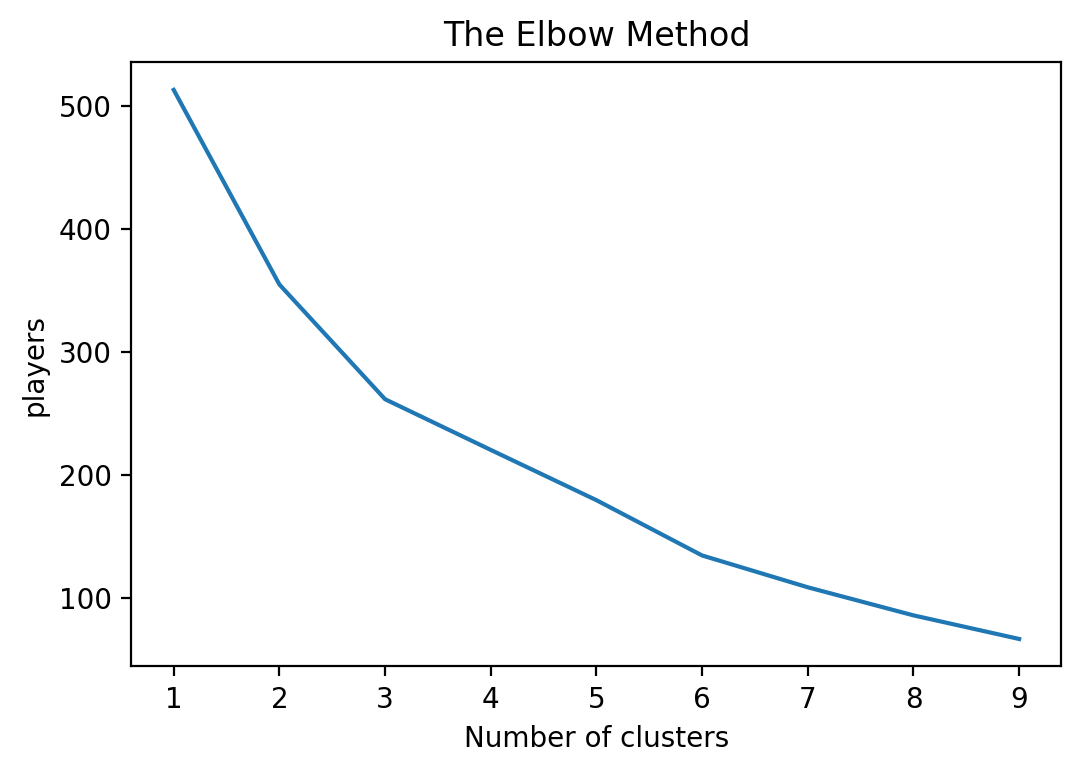

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([1, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 0, 0])

In [28]:
kmeans.cluster_centers_

array([[-8.50133051e-01, -7.55013008e-01, -2.64451098e-01,
        -6.24272916e-01, -5.74016758e-01, -5.34765374e-01,
        -6.06825307e-01, -2.60602290e-01, -2.35702260e-01,
        -5.21916493e-01, -2.91681547e-01, -5.48291811e-01,
        -5.24287369e-01,  3.34973826e-02, -8.50133051e-01,
        -2.47487373e-01, -1.85676618e-01, -3.18689847e-01,
        -1.34667878e-01, -2.41289360e-01,  4.60950594e-02,
         3.84542927e-01,  3.88396294e-02, -3.42997170e-01,
        -2.35702260e-01, -3.66368554e-01, -2.35702260e-01],
       [ 1.01696024e+00,  1.19153970e+00, -3.56224082e-01,
         1.31618687e+00,  1.27948288e+00,  9.55392915e-01,
         1.27914438e+00,  6.04359382e-01,  5.10688231e-01,
         1.16866797e+00,  4.41941738e-02,  1.17110872e+00,
         1.13047662e+00, -3.43009285e-01,  1.01696024e+00,
        -4.12478956e-01, -6.51614656e-01, -3.61633869e-01,
        -6.52188164e-01, -6.65335409e-01, -4.08849861e-04,
        -8.36131097e-01, -1.45703801e-02, -3.42997170e-

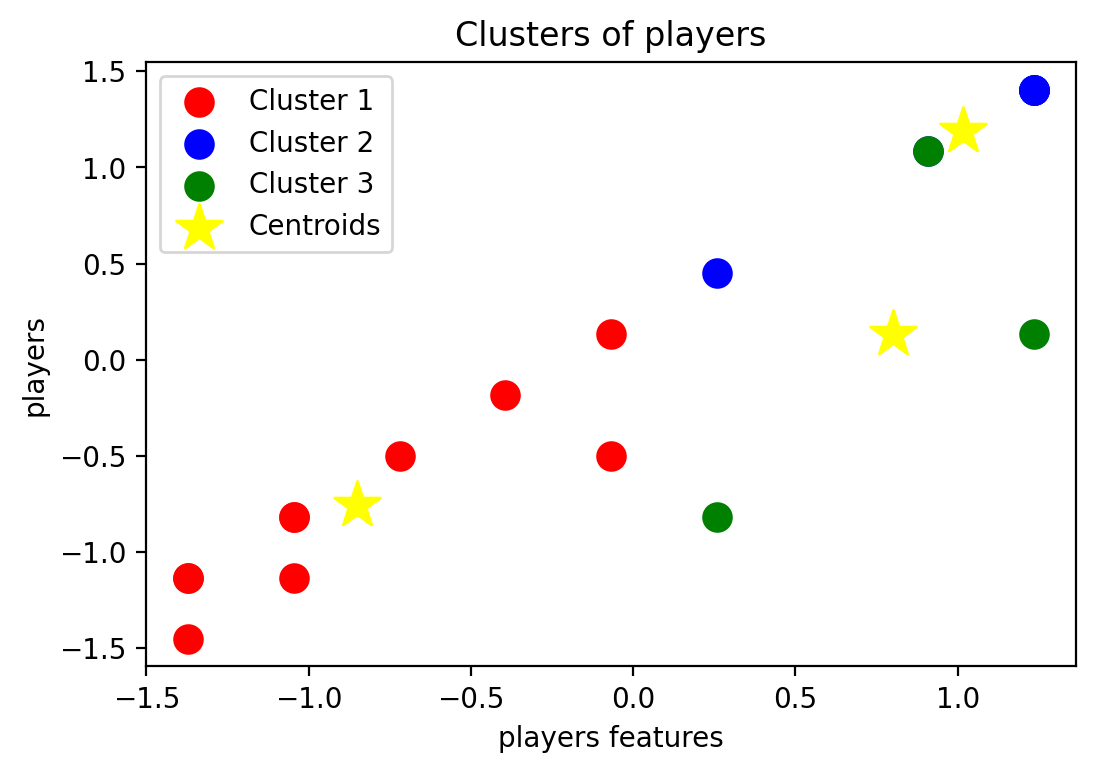

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
Scotland_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,RD Berrington (SCOT),8,8,0,285,81,35.62,304,93.75,0,...,112,1,1/36,112.00,5.09,132.0,0,0,5,0
1,DE Budge (SCOT),2,2,0,51,27,25.50,61,83.60,0,...,26,1,1/21,26.00,4.33,36.0,0,0,0,0
2,KJ Coetzer (SCOT),9,9,0,440,96,48.88,578,76.12,0,...,-,-,-,-,-,-,-,-,2,0
3,MH Cross (SCOT),9,9,0,271,59,30.11,435,62.29,0,...,-,-,-,-,-,-,-,-,6,1
4,JH Davey (SCOT),2,2,1,26,26*,26.00,27,96.29,0,...,68,2,2/46,34.00,4.00,51.0,0,0,1,0
5,AC Evans (SCOT),5,3,0,6,4,2.00,15,40.00,0,...,276,3,2/67,92.00,6.75,81.6,0,0,2,0
6,Hamza Tahir (SCOT),6,2,0,0,0,0.00,2,0.00,0,...,228,13,5/38,17.53,4.04,26.0,1,1,0,0
7,MA Jones (SCOT),3,3,0,87,52,29.00,130,66.92,0,...,-,-,-,-,-,-,-,-,1,0
8,MA Leask (SCOT),4,4,0,39,19,9.75,38,102.63,0,...,138,5,3/37,27.60,4.60,36.0,0,0,3,0
9,CS MacLeod (SCOT),9,9,0,322,100,35.77,399,80.70,1,...,76,1,1/13,76.00,4.75,96.0,0,0,8,0


In [31]:
Scotland_2019["cluster"] = y_kmeans

In [32]:
Scotland_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,RD Berrington (SCOT),8,8,0,285,81,35.62,304,93.75,0,...,1,1/36,112.00,5.09,132.0,0,0,5,0,1
1,DE Budge (SCOT),2,2,0,51,27,25.50,61,83.60,0,...,1,1/21,26.00,4.33,36.0,0,0,0,0,0
2,KJ Coetzer (SCOT),9,9,0,440,96,48.88,578,76.12,0,...,-,-,-,-,-,-,-,2,0,1
3,MH Cross (SCOT),9,9,0,271,59,30.11,435,62.29,0,...,-,-,-,-,-,-,-,6,1,1
4,JH Davey (SCOT),2,2,1,26,26*,26.00,27,96.29,0,...,2,2/46,34.00,4.00,51.0,0,0,1,0,0
5,AC Evans (SCOT),5,3,0,6,4,2.00,15,40.00,0,...,3,2/67,92.00,6.75,81.6,0,0,2,0,0
6,Hamza Tahir (SCOT),6,2,0,0,0,0.00,2,0.00,0,...,13,5/38,17.53,4.04,26.0,1,1,0,0,2
7,MA Jones (SCOT),3,3,0,87,52,29.00,130,66.92,0,...,-,-,-,-,-,-,-,1,0,0
8,MA Leask (SCOT),4,4,0,39,19,9.75,38,102.63,0,...,5,3/37,27.60,4.60,36.0,0,0,3,0,0
9,CS MacLeod (SCOT),9,9,0,322,100,35.77,399,80.70,1,...,1,1/13,76.00,4.75,96.0,0,0,8,0,1


In [33]:
Scotland_2019['cluster'].value_counts()

0    10
1     6
2     3
Name: cluster, dtype: int64

In [34]:
Scotland_Cluster_2019 = np.array([10,6,3])

In [35]:
Scotland_Cluster_2019

array([10,  6,  3])

In [36]:
%store Scotland_Cluster_2019

Stored 'Scotland_Cluster_2019' (ndarray)


In [37]:
Scotland_2019_players_scaled.insert(0, 'Player', Scotland_2019.Player)

In [38]:
Scotland_2019_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,RD Berrington (SCOT),0.908408,1.085749,-0.470940,1.389252,1.460902,1.085798,1.008370,0.942960,-0.235702,...,0.067806,0.047476,-0.505318,2.539985,0.655660,2.613985,-0.342997,-0.235702,1.317011,-0.235702
1,DE Budge (SCOT),-1.045527,-0.818488,-0.470940,-0.410461,-0.171871,0.448777,-0.427228,0.667759,-0.235702,...,-0.576354,-0.698447,-0.505318,-0.168369,0.327033,-0.070497,-0.342997,-0.235702,-0.957826,-0.235702
2,KJ Coetzer (SCOT),1.234064,1.403122,-0.470940,2.581370,1.914450,1.920471,2.627110,0.464951,-0.235702,...,-0.576354,-0.923959,-0.745344,-0.987174,-1.545272,-1.077178,-0.342997,-0.235702,-0.047891,-0.235702
3,MH Cross (SCOT),1.234064,1.403122,-0.470940,1.281577,0.795698,0.738961,1.782293,0.089974,-0.235702,...,-0.576354,-0.923959,-0.745344,-0.987174,-1.545272,-1.077178,-0.342997,-0.235702,1.771979,4.242641
4,JH Davey (SCOT),-1.045527,-0.818488,0.217357,-0.602738,-0.202107,0.480250,-0.628093,1.011828,-0.235702,...,-0.576354,-0.334159,-0.265292,0.083571,0.184340,0.348953,-0.342997,-0.235702,-0.502859,-0.235702
5,AC Evans (SCOT),-0.068559,-0.501115,-0.470940,-0.756560,-0.867311,-1.030471,-0.698987,-0.514383,-0.235702,...,0.067806,1.469934,-0.025266,1.910136,1.373449,1.204632,-0.342997,-0.235702,-0.047891,-0.235702
6,Hamza Tahir (SCOT),0.257097,-0.818488,-0.470940,-0.802706,-0.988257,-1.156364,-0.775789,-1.598918,-0.235702,...,0.067806,1.053605,2.374995,-0.435110,0.201636,-0.350131,2.915476,4.242641,-0.957826,-0.235702
7,MA Jones (SCOT),-0.719871,-0.501115,-0.470940,-0.133582,0.584043,0.669090,-0.019589,0.215508,-0.235702,...,-0.576354,-0.923959,-0.745344,-0.987174,-1.545272,-1.077178,-0.342997,-0.235702,-0.502859,-0.235702
8,MA Leask (SCOT),-0.394215,-0.183742,-0.470940,-0.502754,-0.413763,-0.542634,-0.563108,1.183727,-0.235702,...,0.711967,0.272988,0.454786,-0.117981,0.443782,-0.070497,-0.342997,-0.235702,0.407076,-0.235702
9,CS MacLeod (SCOT),1.234064,1.403122,-0.470940,1.673822,2.035396,1.095240,1.569612,0.589131,4.242641,...,0.067806,-0.264771,-0.505318,1.406256,0.508643,1.607304,-0.342997,-0.235702,2.681914,-0.235702


In [39]:
Scotland_2019_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,RD Berrington (SCOT),1.085798,2.539985
1,DE Budge (SCOT),0.448777,-0.168369
2,KJ Coetzer (SCOT),1.920471,-0.987174
3,MH Cross (SCOT),0.738961,-0.987174
4,JH Davey (SCOT),0.480250,0.083571
5,AC Evans (SCOT),-1.030471,1.910136
6,Hamza Tahir (SCOT),-1.156364,-0.435110
7,MA Jones (SCOT),0.669090,-0.987174
8,MA Leask (SCOT),-0.542634,-0.117981
9,CS MacLeod (SCOT),1.095240,1.406256


In [40]:
Scotland_2019_Ave=Scotland_2019_players_scaled.mean()

In [41]:
Scotland_2019_Ave

Mat_x           2.337312e-17
Inns_x          1.168656e-16
NO             -6.427607e-17
Runs_x          1.168656e-17
HS              8.180591e-17
Ave_x          -1.636118e-16
BF             -5.843279e-18
SR_x           -4.674623e-17
100            -2.921640e-18
50             -2.337312e-17
0               5.258951e-17
4s              3.505967e-17
6s              2.337312e-17
Unnamed: 0_y    1.051790e-16
Mat_y           2.337312e-17
Inns_y          1.168656e-17
Overs          -8.180591e-17
Mdns            3.505967e-17
Runs_y         -3.213803e-17
Wkts            5.843279e-17
Ave_y          -8.180591e-17
Econ            2.804774e-16
SR_y           -2.921640e-17
4               4.090295e-17
5               4.382459e-17
Ct              1.051790e-16
St              6.719771e-17
dtype: float64

In [42]:
Scotland_Ave_2019 =Scotland_2019_Ave[['Ave_x','Ave_y']]

In [43]:
Scotland_Ave_2019

Ave_x   -1.636118e-16
Ave_y   -8.180591e-17
dtype: float64

In [44]:
Scotland_Ave_2019 = np.array([Scotland_Ave_2019.Ave_x, Scotland_Ave_2019.Ave_y])

In [45]:
Scotland_Ave_2019

array([-1.63611814e-16, -8.18059071e-17])

In [46]:
%store Scotland_Ave_2019

Stored 'Scotland_Ave_2019' (ndarray)


In [47]:
Scotland_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,RD Berrington (SCOT),8,8,0,285,81,35.62,304,93.75,0,...,1,1/36,112.00,5.09,132.0,0,0,5,0,1
1,DE Budge (SCOT),2,2,0,51,27,25.50,61,83.60,0,...,1,1/21,26.00,4.33,36.0,0,0,0,0,0
2,KJ Coetzer (SCOT),9,9,0,440,96,48.88,578,76.12,0,...,-,-,-,-,-,-,-,2,0,1
3,MH Cross (SCOT),9,9,0,271,59,30.11,435,62.29,0,...,-,-,-,-,-,-,-,6,1,1
4,JH Davey (SCOT),2,2,1,26,26*,26.00,27,96.29,0,...,2,2/46,34.00,4.00,51.0,0,0,1,0,0
5,AC Evans (SCOT),5,3,0,6,4,2.00,15,40.00,0,...,3,2/67,92.00,6.75,81.6,0,0,2,0,0
6,Hamza Tahir (SCOT),6,2,0,0,0,0.00,2,0.00,0,...,13,5/38,17.53,4.04,26.0,1,1,0,0,2
7,MA Jones (SCOT),3,3,0,87,52,29.00,130,66.92,0,...,-,-,-,-,-,-,-,1,0,0
8,MA Leask (SCOT),4,4,0,39,19,9.75,38,102.63,0,...,5,3/37,27.60,4.60,36.0,0,0,3,0,0
9,CS MacLeod (SCOT),9,9,0,322,100,35.77,399,80.70,1,...,1,1/13,76.00,4.75,96.0,0,0,8,0,1
